# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import gmaps

# Import API key
from api_keys import api_key
from api_keys import gkey

#Access maps with gkey
gmaps.configure(api_key=gkey)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=3000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=3000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
lat_lngs = zip(lats, lngs)
list_lats_lngs = list(lat_lngs)
#print(list_lats_lngs)

In [3]:
#Seeing how spread out the coordinates are to ensure full coverage of the globe
#figure_layout = {
#    'width': '400px',
#    'height': '300px',
#    'border': '1px solid black',
#    'padding': '1px',
#    'margin': '0 auto 0 auto'}

#fig = gmaps.figure(layout=figure_layout)
#markers = gmaps.marker_layer(list_lats_lngs)
#fig.add_layer(markers)
#fig

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_sets = []
weather_list = []

for x in range(1,15):
    city_set = random.sample(cities, 50)
    city_sets.append(city_set)

print("Beginning Data Retrieval")
print("------------------------")    

weather_list = []
    
for city in cities:
        if len(weather_list) == 1000:
            print("End of Data Retrieval")
            break
        try:
            print(f"Processing Record {cities.index(city) + 1} | {city}")

            city_url = url + "appid=" + api_key + "&q=" + city
            response = requests.get(city_url)
            city_weather = response.json()    

            weather_list.append({
                "City": city_weather['name'],
                "Country": city_weather['sys']['country'],
                "Temperature": (city_weather['main']['temp'] - 273.15),
                "Humidity": city_weather['main']['humidity'],
                "Cloudiness": city_weather['clouds']['all'],
                "Max Temp": (city_weather['main']['temp_max'] - 273.15),
                "Wind Speed": city_weather['wind']['speed'],
                "Latitude": city_weather['coord']['lat'],
                "Longitude": city_weather['coord']['lon']
            })
        except KeyError:
            print("City not found.  Skipping...")

Beginning Data Retrieval
------------------------
Processing Record 1 | husavik
Processing Record 2 | manoel urbano
Processing Record 3 | krasnyy chikoy
Processing Record 4 | half moon bay
Processing Record 5 | solnechnyy
Processing Record 6 | vondrozo
Processing Record 7 | mount pleasant
Processing Record 8 | mataura
Processing Record 9 | hilo
Processing Record 10 | artyk
City not found.  Skipping...
Processing Record 11 | ushuaia
Processing Record 12 | brunico
Processing Record 13 | port alfred
Processing Record 14 | phan rang
City not found.  Skipping...
Processing Record 15 | oktyabrskiy
Processing Record 16 | bluff
Processing Record 17 | dikson
Processing Record 18 | kalengwa
Processing Record 19 | ahipara
Processing Record 20 | kapaa
Processing Record 21 | punta arenas
Processing Record 22 | barra patuca
Processing Record 23 | sambalpur
Processing Record 24 | malakal
City not found.  Skipping...
Processing Record 25 | alta floresta
Processing Record 26 | tosya
Processing Record 2

Processing Record 230 | wick
Processing Record 231 | caravelas
Processing Record 232 | santa maria do para
Processing Record 233 | lavrentiya
Processing Record 234 | opunake
Processing Record 235 | takoradi
Processing Record 236 | dovers
Processing Record 237 | giehun
Processing Record 238 | nikolskoye
Processing Record 239 | attawapiskat
City not found.  Skipping...
Processing Record 240 | tessalit
Processing Record 241 | saint-philippe
Processing Record 242 | playa del carmen
Processing Record 243 | khor
Processing Record 244 | otta
Processing Record 245 | baykit
Processing Record 246 | dharmadam
Processing Record 247 | mombetsu
Processing Record 248 | saint george
Processing Record 249 | chokurdakh
Processing Record 250 | peniche
Processing Record 251 | springville
Processing Record 252 | meyungs
City not found.  Skipping...
Processing Record 253 | salalah
Processing Record 254 | hithadhoo
Processing Record 255 | port hardy
Processing Record 256 | arraial do cabo
Processing Record 2

Processing Record 454 | pianoro
Processing Record 455 | ekhabi
Processing Record 456 | gorontalo
Processing Record 457 | shitanjing
Processing Record 458 | roebourne
Processing Record 459 | santa lucia
Processing Record 460 | linxia
Processing Record 461 | launceston
Processing Record 462 | constitucion
Processing Record 463 | palabuhanratu
City not found.  Skipping...
Processing Record 464 | kempsey
Processing Record 465 | fresnillo
Processing Record 466 | carbondale
Processing Record 467 | seoul
Processing Record 468 | bintulu
Processing Record 469 | yumen
Processing Record 470 | klaksvik
Processing Record 471 | sokur
Processing Record 472 | vila franca do campo
Processing Record 473 | ilhabela
Processing Record 474 | brandfort
Processing Record 475 | angoche
Processing Record 476 | diglur
Processing Record 477 | bhatkal
Processing Record 478 | waipawa
Processing Record 479 | necochea
Processing Record 480 | sungai siput utara
City not found.  Skipping...
Processing Record 481 | metr

Processing Record 687 | charters towers
Processing Record 688 | pachino
Processing Record 689 | tateyama
Processing Record 690 | soyo
Processing Record 691 | jinxiang
Processing Record 692 | sale
Processing Record 693 | lodwar
Processing Record 694 | abha
Processing Record 695 | meulaboh
Processing Record 696 | nouakchott
Processing Record 697 | nyurba
Processing Record 698 | zaltan
Processing Record 699 | deyang
Processing Record 700 | phan thiet
Processing Record 701 | manavgat
Processing Record 702 | thies
Processing Record 703 | capao da canoa
Processing Record 704 | gizo
Processing Record 705 | sedelnikovo
City not found.  Skipping...
Processing Record 706 | gurkovo
Processing Record 707 | beira
Processing Record 708 | khash
Processing Record 709 | maltahohe
Processing Record 710 | dryden
Processing Record 711 | lewisporte
Processing Record 712 | khormuj
City not found.  Skipping...
Processing Record 713 | san isidro
Processing Record 714 | kleck
City not found.  Skipping...
Proce

Processing Record 915 | itaituba
Processing Record 916 | alekseyevsk
Processing Record 917 | bahia honda
Processing Record 918 | majene
Processing Record 919 | kyzyl-suu
Processing Record 920 | cam pha
City not found.  Skipping...
Processing Record 921 | utiroa
City not found.  Skipping...
Processing Record 922 | amuntai
Processing Record 923 | inverness
Processing Record 924 | lazaro cardenas
Processing Record 925 | samana
Processing Record 926 | lolua
City not found.  Skipping...
Processing Record 927 | dwarka
Processing Record 928 | brockville
Processing Record 929 | ola
Processing Record 930 | teacapan
Processing Record 931 | praia da vitoria
Processing Record 932 | asau
City not found.  Skipping...
Processing Record 933 | grand bank
Processing Record 934 | salinas
Processing Record 935 | tarakan
Processing Record 936 | sturgis
Processing Record 937 | hobyo
Processing Record 938 | fevralsk
City not found.  Skipping...
Processing Record 939 | port pirie
Processing Record 940 | semil

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(weather_list)
weather_df['Temperature (F)'] = (weather_df['Temperature'] * (9/5)) + 32
weather_df['Max Temp (F)'] = (weather_df['Max Temp'] * (9/5)) + 32
weather_df.to_csv('City Weather.csv')

weather_df.head()

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temp,Temperature,Wind Speed,Temperature (F),Max Temp (F)
0,Husavik,53,CA,60,50.56,-96.99,20.00,19.70,6.61,67.460,68.000
1,Manoel Urbano,0,BR,48,-8.84,-69.26,31.95,31.95,0.17,89.510,89.510
2,Krasnyy Chikoy,51,RU,83,50.36,108.75,15.95,15.95,1.07,60.710,60.710
3,Half Moon Bay,90,US,100,37.46,-122.43,15.56,13.92,3.65,57.056,60.008
4,Solnechnyy,100,RU,97,50.72,136.64,18.15,18.15,0.52,64.670,64.670


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

(0, 120)

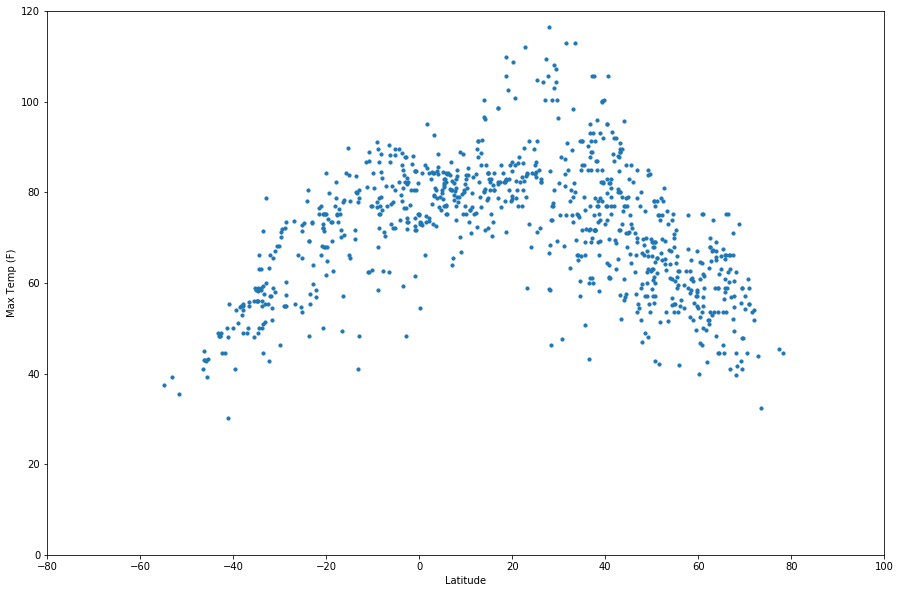

In [6]:
weather_df.plot(kind='scatter', x='Latitude', y='Max Temp (F)', figsize=(15,10), s=10)
plt.xlim(-80, 100)
plt.ylim(0, 120)

#### Latitude vs. Humidity Plot

(-10, 120)

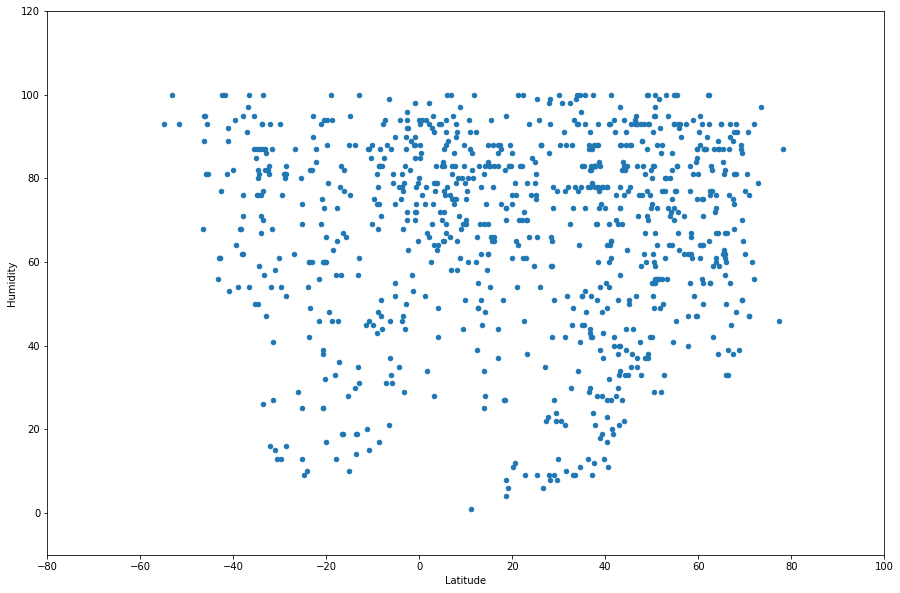

In [7]:
weather_df.plot(kind='scatter', x='Latitude', y='Humidity', figsize=(15,10))
plt.xlim(-80, 100)
plt.ylim(-10, 120)

#### Latitude vs. Cloudiness Plot

(-10, 120)

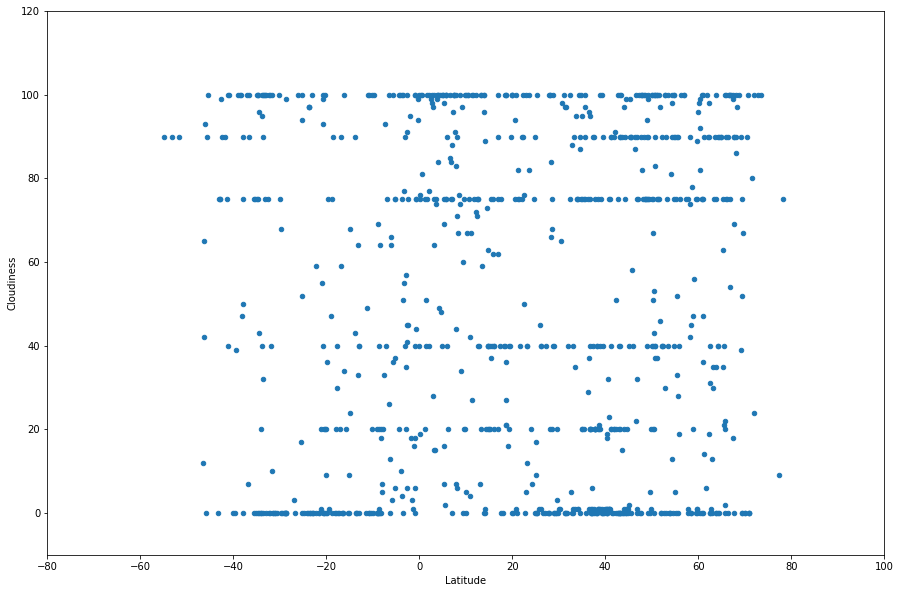

In [8]:
weather_df.plot(kind='scatter', x='Latitude', y='Cloudiness', figsize=(15,10))
plt.xlim(-80, 100)
plt.ylim(-10, 120)

#### Latitude vs. Wind Speed Plot

(-1, 20)

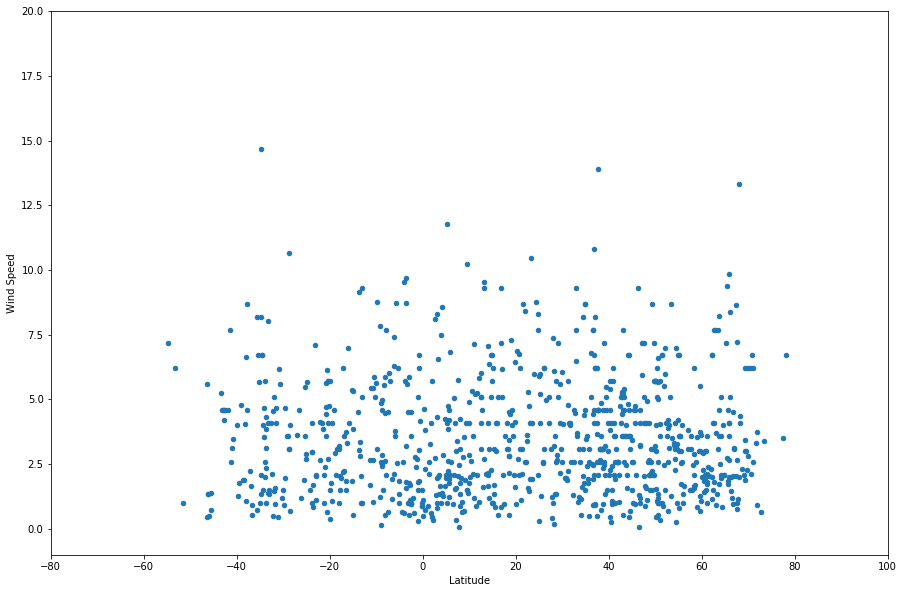

In [9]:
weather_df.plot(kind='scatter', x='Latitude', y='Wind Speed', figsize=(15,10))
plt.xlim(-80, 100)
plt.ylim(-1, 20)